## 3. Model Complexity

Many machine learning models have parameters that control the complexity of the model. We call these **hyperparameters**.

These hyperparameters have to be set in advance (i.e. before model training).

There are 2 extreme scenarios:

1. If the model is too **simple**, it will not be able to fit the training data well and it will perform poorly. It is called **underfitting**.
2. If the model is too **complex**, it will fit the training data (too) well and but perform poorly on unseen test data. It is called **overfitting**.

![](https://miro.medium.com/max/555/1*tBErXYVvTw2jSUYK7thU2A.png)

Therefore, it is required to optimize the hyperparameters, which is called **model selection**.

If there are many hyperparameters, it is required to do model selection automatically.

In [0]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

### Exercise 3.0: Run a Polynomial regression model on the datapoints

1. Generate random dataset (this has been done!)

2. Do train and test split with test_size = 0.2, random_state = 42 by using the train_test_split() function from sklearn. Split x and y into x_train, x_test, y_train, y_test

3. Plot the figure to see the distribution of data

4. Use LinearRegression model and check the training and testing loss (i.e. under fitting)
 
5. Use Polynomial Regression model with lower degree and check the training and testing loss (i.e. perfect fitting)

6. Use Polynomial Regression model with higher degree and check the training and testing loss (i.e. over fitting)

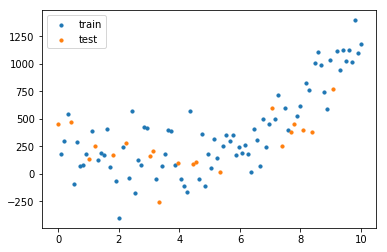

In [0]:
# Generate random dataset
np.random.seed(0)
n_samples = 100
x = np.linspace(0, 10, n_samples)
y = x ** 3 + np.random.randn(n_samples) * 200 + 100

# Do train and test split with test_size = 0.2, random_state = 42 by using the train_test_split() function from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Plot the figure to see the results
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, s=10, label='train')
plt.scatter(x_test, y_test, s=10, label = 'test')
plt.legend()
plt.show()

Training loss: 266.19732710419703
Testing loss: 287.1846250105157


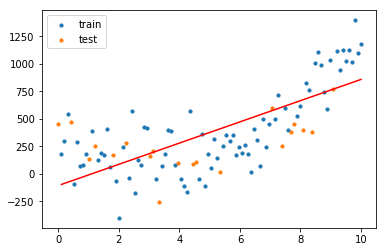

In [0]:
## Underfitting

# Generate random dataset
np.random.seed(0)
n_samples = 100
x = np.linspace(0, 10, n_samples)
y = x ** 3 + np.random.randn(n_samples) * 200 + 100

x = x[:, np.newaxis] #(100, ) to (100,1)
y = y[:, np.newaxis]

# Do train and test split with test_size = 0.2, random_state = 42 by using the train_test_split() function from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit Linear Regression model to the training set
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the learned model on training / testing set to identify the training / testing loss
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Print the training / testing loss
print('Training loss:', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing loss:', np.sqrt(mean_squared_error(y_test,y_pred_test)))
      
  
# Plot the figure concerning training / testing data distribution
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, s=10, label='train')  
plt.scatter(x_test, y_test, s=10, label = 'test')

# Sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_train), key=sort_axis)
x_train, y_pred_train = zip(*sorted_zip)

# Add the linear regression line as the learned model
plt.plot(x_train, y_pred_train, color='r')
plt.legend()
plt.show()

Training loss: 186.70778129488073
Testing loss: 185.945085057531


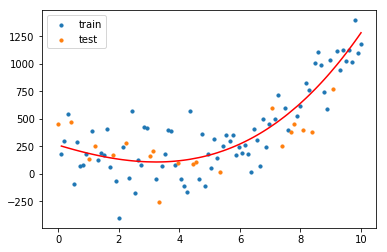

In [0]:
## Perfect fitting with degree = 3

# Generate random dataset
np.random.seed(0)
n_samples = 100

x = np.linspace(0, 10, n_samples)
y = x ** 3 + np.random.randn(n_samples) * 200 + 100

x = x[:, np.newaxis] #(100, ) to (100,1)
y = y[:, np.newaxis]

# Do train and test split with test_size = 0.2, random_state = 42 by using the train_test_split() function from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit Polynomial Regression model with degree=3 to the training set
polynomial_features= PolynomialFeatures(degree=3)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)

# Predict the learned model on training / testing set to identify the training / testing loss
y_pred_train = model.predict(x_poly_train)
y_pred_test = model.predict(x_poly_test)

# Print the training / testing loss
print('Training loss:', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing loss:', np.sqrt(mean_squared_error(y_test,y_pred_test)))
  
# Plot the figure concerning training / testing data distribution
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, s=10, label='train')  
plt.scatter(x_test, y_test, s=10, label = 'test')

# Sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_train), key=sort_axis)
x_train, y_pred_train = zip(*sorted_zip)

# Add the polynomial regression line as the learned model
plt.plot(x_train, y_pred_train, color='r')
plt.legend()
plt.show()

Training loss: 181.17275882528554
Testing loss: 216.27993355311503


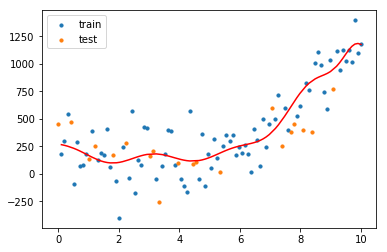

In [0]:
## Over-fitting with degree = 15

# Generate random dataset
np.random.seed(0)
n_samples = 100

x = np.linspace(0, 10, n_samples)
y = x ** 3 + np.random.randn(n_samples) * 200 + 100

x = x[:, np.newaxis] #(100, ) to (100,1)
y = y[:, np.newaxis]

# Do train and test split with test_size = 0.2, random_state = 42 by using the train_test_split() function from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit Polynomial Regression model with degree=15 to the training set
polynomial_features= PolynomialFeatures(degree=15)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)

# Predict the learned model on training / testing set to identify the training / testing loss
y_pred_train = model.predict(x_poly_train)
y_pred_test = model.predict(x_poly_test)

print('Training loss:', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing loss:', np.sqrt(mean_squared_error(y_test,y_pred_test)))

# Plot the figure concerning training / testing data distribution
plt.figure(figsize=(6,4))      
plt.scatter(x_train, y_train, s=10, label='train')  
plt.scatter(x_test, y_test, s=10, label = 'test')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_train), key=sort_axis)
x_train, y_pred_train = zip(*sorted_zip)

# Add the polynomial regression line as the learned model
plt.plot(x_train, y_pred_train, color='r')
plt.legend()
plt.show()

### 3.1 Optimize Hyperparameters

To optimize the hyperparameters, we train the model with various hyperparameter values, and test what model performs best

### 3.1.1 Fixed-split cross-validation
1. A dataset is partitioned into the training, validation, and testing sets. 
2. The training set is used to fit a model by giving a set of hyperparameters
3. The validation set is used to evaluate the performance of the model given the hyperparameters. 
4. We repeat step 2 and 3 by issuing different sets of hyperparameters and pick the set that leads to the highest validation
5. Use both the training and validation sets to train our final model, and apply it to the testing set to evaluate the model performance. 

The following figure illustrates the procedure:

![](https://i.stack.imgur.com/osBuF.png)

One major disadvantage of the fixed-split method is that the validation and testing performance is sensitive to the random
splits. If we have a unfortunate split such that the validation (resp. testing) set is unrepresentative, we may end up picking
suboptimal hyperparameters (resp. reporting a misleading performance score).

### 3.1.2 Folded (K-fold) Cross-Validation
Next, we take a look at a more robust technique called the K-Fold Cross-Validation.

In K-fold cross-validation (CV), we randomly split the training dataset into folds without replacement, where folds
are used for the model training and the remaining 1 fold is for testing. This procedure is repeated times so that we obtain
models and performance estimates. Then we take their average as the final performance estimate. The following
figure illustrate the 10-fold CV:
![](http://karlrosaen.com/ml/learning-log/2016-06-20/k-fold-diagram.png)

The advantage of this
approach is that the performance is less sensitive to unfortunate splits of data. In addition, it utilize data better since each
example can be used for both training and validation/testing.

## Fixed-split vs K-fold Cross-Validation

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. 

This gives you a better indication of how well your model will perform on unseen data. Fixed-split, on the other hand, is dependent on just one train-test split. 

That makes the fixed-split method score dependent on how the data is split into train and test sets.

The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, 
or you are starting to build an initial model in your data science project. 

Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the fixed-split method.

### Exercise 3.1: Fixed-split vs K-fold Cross-Validation

1. Load the iris dataset from sklearn

2. Use Fixed-split cross-validation to pick the best-fit hyperparameter k for KNN classifier

3. Use K-fold cross-validation to pick the best-fit hyperparameter k for KNN classifier

4. Interpret the results

## What is KNN?

KNN, standing for (K-nearest neighbor), is an algorithm which can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. 
It is commonly used for its easy of interpretation and low calculation time, so can be implemented as a baseline method to compare.

Suppose you have a data distributed like this with two different classes
![](https://i0.wp.com/www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario1.png?w=715&ssl=1)


You intend to find out the class of the blue star (BS) . BS can either be RC or GS and nothing else. The “K” is KNN algorithm is the nearest neighbors we wish to take vote from. Let’s say K = 3. Hence, we will now make a circle with BS as center just as big as to enclose only three datapoints on the plane. Refer to following diagram for more details:
![](https://i2.wp.com/www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario2.png?w=715&ssl=1)


The three closest points to BS is all RC. Hence, with good confidence level we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm. 

#### Fixed-split Cross-Validation

In [0]:
# Load the iris dataset from sklearn

iris = datasets.load_iris()
X, y = iris.data[:, [1, 2]], iris.target

# fixed-split training / testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# fixed-split training / validation set
X_itrain, X_val, y_itrain, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0)

In [0]:
best_k, best_score = -1, -1
clfs = {}

# Hyperparameter tuning for K = [1, 15, 20]
for k in [1, 15, 50]:
  pipe = Pipeline([['sc', StandardScaler()],
                   ['clf', KNeighborsClassifier(n_neighbors=k)]])
  
  # Fit training set
  pipe.fit(X_itrain, y_itrain)
  
  # Evaluate on validation set
  y_pred = pipe.predict(X_val)
  
  # Only one score for the validation accuracy
  score = accuracy_score(y_val, y_pred) 
  
  # Print the validation accuracy
  print('[{}-NN]\nValidation accuracy: {}'.format(k, score)) 
  
  # Select the best K concerning the validation accuracy score
  if score > best_score:
    best_k, best_score = k, score
      
  clfs[k] = pipe

[1-NN]
Validation accuracy: 0.9375
[15-NN]
Validation accuracy: 0.90625
[50-NN]
Validation accuracy: 0.4375


In [0]:
# Use the trained model with the optimized parameter and train on whole training set (i.e. training + validation set)
clf = clfs[best_k]

# Fit the model to the whole training set
clf.fit(X_train, y_train)

# Predict on testing data and report the evaluation result
y_pred = clf.predict(X_test)
print('\nTest accuracy: %.2f (n_neighbors=%d selected by the holdout method)' %
      (accuracy_score(y_test, y_pred), best_k))



Test accuracy: 0.89 (n_neighbors=1 selected by the holdout method)


#### K-fold Cross-Validation

In [0]:
# Load the iris dataset from sklearn
iris = datasets.load_iris()
X, y = iris.data[:, [1, 2]], iris.target

# fixed-split training / testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [0]:
best_k, best_score = -1, -1
clfs = {}

# Hyperparameter tuning for K = [1, 15, 20]
for k in [1, 15, 20]:
  pipe = Pipeline([['sc', StandardScaler()],
                   ['clf', KNeighborsClassifier(n_neighbors=k)]])
  
  # Fit training set
  pipe.fit(X_train, y_train)
  
  # K-Fold CV, evaluate the validation accuracy score for each fold
  scores = cross_val_score(pipe, X_train, y_train, cv=5)
  
  # Print the result of validation accuracy score
  print('[%d-NN]\nValidation accuracy: %.3f %s' % (k, scores.mean(), scores)) 
  
  # Select the best K concerning the validation accuracy score
  if scores.mean() > best_score:
    best_k, best_score = k, scores.mean()
    
  clfs[k] = pipe

[1-NN]
Validation accuracy: 0.894 [0.91304348 0.95454545 0.85       0.85       0.9       ]
[15-NN]
Validation accuracy: 0.914 [0.95652174 0.86363636 0.85       0.9        1.        ]
[20-NN]
Validation accuracy: 0.885 [0.91304348 0.86363636 0.85       0.85       0.95      ]


In [0]:
# Use the trained model with the optimized parameter and train on whole training set (i.e. training + validation set)
best_clf = clfs[best_k]

# Fit the model to the whole training set
best_clf.fit(X_train, y_train)

# Predict on testing data and report the evaluation result
y_pred = best_clf.predict(X_test)
print('\nTest accuracy: %.2f (n_neighbors=%d selected by 5-fold CV)' %
      (accuracy_score(y_test, y_pred), best_k))


Test accuracy: 0.93 (n_neighbors=15 selected by 5-fold CV)
